<a href="https://colab.research.google.com/github/jamespan1118/Xenopus_signal_processing/blob/main/Female_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective: Show that female pitch doesn’t differ significantly across Xenopus species


In [1]:
import librosa
import os
import numpy as np
import seaborn as sns
from librosa import display
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d
from scipy.fft import rfft, rfftfreq

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
def showFemalePitch():
  i = 1
  N= 15000
  color = ['royalblue','orange','purple','brown','cyan']
  species_name = ['$\it{X. laevis}$','$\it{X. petersii}$', '$\it{X. victorianus}$', '$X. poweri$']
  species_list = ['Laevis','Petersii', 'Vic', 'Poweri']
  size_list=['2','4','5','6']
  plt.figure(figsize=(10,7))
  path='/content/drive/MyDrive/Recordings_for_IPI/Female_only_2s'
  for i in range(0,4):
    all_yf = []
    for filename in os.listdir(path):
      if filename.startswith(species_list[i]): 
          #print(filename)
          samples, sampling_rate = librosa.load(path+'/'+filename,sr=44100)
          yf = abs(rfft(samples))
          yf_normalized = yf/np.max(yf)
          envelope = gaussian_filter1d(yf_normalized,sigma=100)
          xf = rfftfreq(len(samples), 1 / sampling_rate)
          #print(len(xf),len(yf))
          all_yf.append(envelope[:N]) 
    mean_list = np.mean(all_yf,axis=0,dtype=float)
    plt.plot(xf[:N],mean_list,color = color[i-1], label=species_name[i]+', N='+size_list[i],linewidth=2)
    plt.xlim(0,5000)
    plt.ylabel("Relative Intensity",labelpad=10,fontsize=20)
    plt.xlabel("Frequency (Hz)",labelpad=10,fontsize=20)
    plt.yticks([0.00,0.15,0.30],fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(prop={'size': 16})
    i=i+1
  plt.show

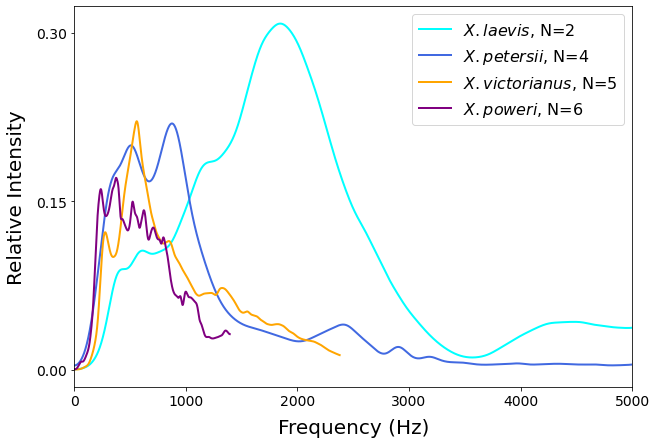

In [22]:
showFemalePitch()

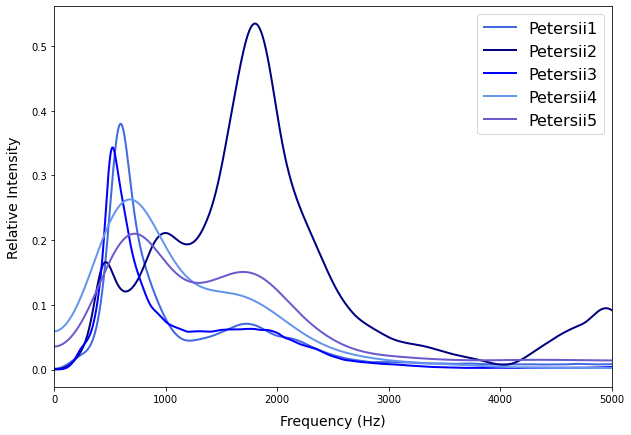

In [36]:
showFemalePitch('Petersii')

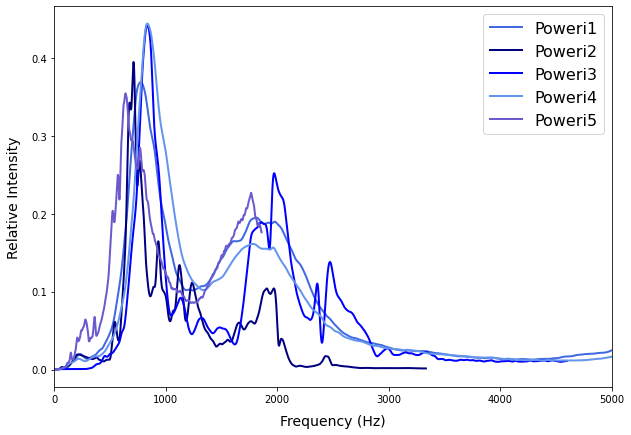

In [37]:
showFemalePitch('Poweri')

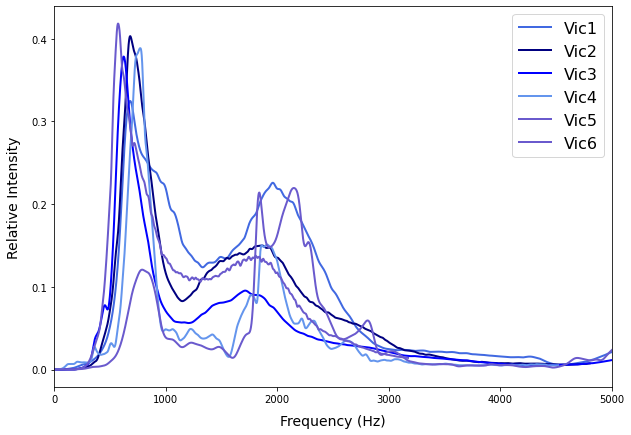

In [38]:
showFemalePitch('Vic')